In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class FEMBasis(object):
    """This is gonna be my class for all the basis functions"""
    def __init__(this, x, N):
        """Takes a sympy symbol and the 1-D Mesh size, higher dimensions can be created via Kronecker delta product"""
        if isinstance(x, sp.Symbol):
            h = sp.Rational(1, N-1)
        else:
            h = 1.0/(N-1)
        this.points = [i*h for i in range(N)]
        this.psi = [this.Lagrange_polynomial(x, i, this.points) for i in range(N)]

        
    def Lagrange_polynomial(this, x, i, points):
        p = 1
        for k in range(len(points)):
            if k != i:
                p *= (x - points[k])/(points[i] - points[k])
        return p

In [14]:
x = sp.symbols('x')
myFEM = FEMBasis(x,5)

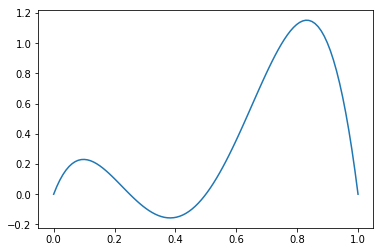

In [19]:
from sympy import lambdify
x_i = np.linspace(0,1,100)
lam_x = lambdify(x, myFEM.psi[3], modules=['numpy']) ##plot of psi_4
plt.plot(x_i,lam_x(x_i))
plt.show()

In [23]:
def integrate(f,a,b,N):
    """integrates f using Chebyshev-Gauss Quadrature"""
    xi = np.cos(np.pi*(1-np.linspace(0,1,N+1))) ## [-1,1] Chebyshev points
    wi = np.pi/N*(1-xi**2)**0.5 ## weights
    xi = a+(b-a)*(xi+1.0)/2.0 ## mapping to interval [a,b]
    wi*=(b-a)/2.0 ## adjusting weights to reflect mapped domain
    return(sum(wi*f(xi)))

def innerproduct(f,g,a,b,N):
    """inner product of two functions"""
    return(integrate(lambda x: f(x)*g(x),a,b,N))

lam_x = [] ## convert all them sympy expressions into sweet organic lambdas
for i in range(0,len(myFEM.psi)):
    lam_x.append(lambdify(x, myFEM.psi[i], modules=['numpy']))
    

A = []    
for i in range(0,len(lam_x)):
    """this makes the Matrix A"""
    row = []
    for j in range (0,len(lam_x)):
        row.append(innerproduct(lam_x[i],lam_x[j],0,1,100))
    A.append(row)

In [24]:
A

[[0.05145797721037703,
  0.052204601799516158,
  -0.030687842887856288,
  0.0098765486338112784,
  -0.0051146404813093771],
 [0.052204601799516158,
  0.31604938268204502,
  -0.067724867694247001,
  0.045149911796164614,
  0.0098765486338112645],
 [-0.030687842887856288,
  -0.067724867694247001,
  0.33015873012426999,
  -0.067724867694247029,
  -0.030687842887856257],
 [0.0098765486338112784,
  0.045149911796164614,
  -0.067724867694247029,
  0.31604938268204519,
  0.052204601799516179],
 [-0.0051146404813093771,
  0.0098765486338112645,
  -0.030687842887856257,
  0.052204601799516179,
  0.051457977210377037]]

Okay y'all I've had like four cups of coffee and it's 10:24 PM and woowee should I have another? But this is coming along, this is really nice actually. I'm thinking, sympy makes it really easy to do differentiation of a function and then I can bring in the lambdify again and make my set of phi's and d(phi's) as lambda's and then voila we got working FEM code! Also, I'm suddenly so aware of my need to learn LaTeX holy cow.

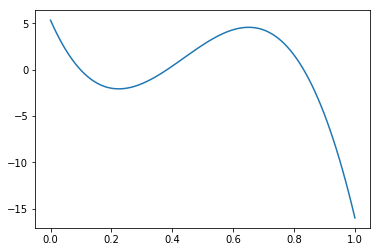

In [26]:
x_i = np.linspace(0,1,100)
lam_x = lambdify(x, sp.diff(myFEM.psi[3]), modules=['numpy']) ##plot of psi_4
plt.plot(x_i,lam_x(x_i))
plt.show()